In [790]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [791]:
df1 = pd.read_csv("D:\GitHub\Real_Estate_Price_Prediction_Project\Data\Bengaluru_House_Data.csv")
df1.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Ben\AppData\Local\Temp\ipykernel_78136\4077473976.py:1: SyntaxWarning: invalid escape sequence '\G'
  df1 = pd.read_csv("D:\GitHub\Real_Estate_Price_Prediction_Project\Data\Bengaluru_House_Data.csv")


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [792]:
df1.shape

(13320, 9)

In [793]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [794]:
df2 = df1.drop(["area_type", "society", "balcony", "availability"], axis=1)
df2["price"] = df2["price"]
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [795]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [796]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [797]:
df3.shape

(13246, 5)

In [798]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [799]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\Ben\AppData\Local\Temp\ipykernel_78136\1418285638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [800]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [801]:
df3[df3["bhk"] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [802]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [803]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [804]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [805]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return ((float(tokens[0]) + float(tokens[1])) / 2)
    try:
        return float(x)
    except:
        return None

In [806]:
print(convert_sqft_to_num("2166"))
print(convert_sqft_to_num("2166 - 2400"))
print(convert_sqft_to_num("2166 - 2400 - 2500"))
print(convert_sqft_to_num("34.46sq. meter"))

2166.0
2283.0
None
None


In [807]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [808]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [809]:
(2100 + 2850) / 2

2475.0

In [810]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [811]:
df5 = df4.copy()
df5["price"] = df5["price"] * 100000
df5["price"] = df5["price"] * .011 # current conversion rate from Rupees to USD
df5["price_per_sqft"] = df5["price"] / df5["total_sqft"]
df5.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,42977.0,2,40.697917
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,132000.0,4,50.769231
2,Uttarahalli,3 BHK,1440.0,2.0,68200.0,3,47.361111
3,Lingadheeranahalli,3 BHK,1521.0,3.0,104500.0,3,68.704799
4,Kothanur,2 BHK,1200.0,2.0,56100.0,2,46.750000


In [812]:
len(df5["location"].unique())

1304

In [813]:
df5["location"] = df5["location"].apply(lambda x: x.strip())

location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [814]:
locations_less_than_10 = location_stats[location_stats <= 10]

In [815]:
df5["location"] = df5["location"].apply(lambda x: "other" if x in locations_less_than_10 else x)

In [816]:
len(df5["location"].unique())

242

In [817]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,42977.0,2,40.697917
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,132000.0,4,50.769231
2,Uttarahalli,3 BHK,1440.0,2.0,68200.0,3,47.361111
3,Lingadheeranahalli,3 BHK,1521.0,3.0,104500.0,3,68.704799
4,Kothanur,2 BHK,1200.0,2.0,56100.0,2,46.750000
5,Whitefield,2 BHK,1170.0,2.0,41800.0,2,35.726496
6,Old Airport Road,4 BHK,2732.0,4.0,224400.0,4,82.137628
7,Rajaji Nagar,4 BHK,3300.0,4.0,660000.0,4,200.000000
8,Marathahalli,3 BHK,1310.0,3.0,69575.0,3,53.110687
9,other,6 Bedroom,1020.0,6.0,407000.0,6,399.019608


In [818]:
df5[df5["total_sqft"] / df5["bhk"] < 300].head() # There are generally at least 300 sqft per bedroom

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,407000.0,6,399.019608
45,HSR Layout,8 Bedroom,600.0,9.0,220000.0,8,366.666667
58,Murugeshpalya,6 Bedroom,1407.0,4.0,165000.0,6,117.270789
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,93500.0,8,69.259259
70,other,3 Bedroom,500.0,3.0,110000.0,3,220.000000


In [819]:
df5.shape

(13246, 7)

In [820]:
df6 = df5[~(df5["total_sqft"] / df5["bhk"] < 300)]
df6.head()
df6.shape

(12502, 7)

In [821]:
df6["price_per_sqft"].describe()

count    12456.000000
mean        69.393531
std         45.849401
min          2.946128
25%         46.315789
50%         58.235294
75%         76.083333
max       1941.176471
Name: price_per_sqft, dtype: float64

In [822]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,42977.0,2,40.697917
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,132000.0,4,50.769231
2,Uttarahalli,3 BHK,1440.0,2.0,68200.0,3,47.361111
3,Lingadheeranahalli,3 BHK,1521.0,3.0,104500.0,3,68.704799
4,Kothanur,2 BHK,1200.0,2.0,56100.0,2,46.750000


In [823]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        std = np.std(subdf["price_per_sqft"])
        cleaned_df = subdf[(subdf["price_per_sqft"] >= (m - std)) & (subdf["price_per_sqft"] <= (m + std))]
        df_out = pd.concat([df_out, cleaned_df], ignore_index=True)
    return df_out

In [824]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [825]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(bhk2["total_sqft"], bhk2["price"], marker="x", color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3["total_sqft"], bhk3["price"], marker="+", color='green', label='3 BHK', s=50)
    plt.xlabel("Total Area in Square Feet")
    plt.ylabel("Price (USD)")
    plt.title(location)
    plt.legend()

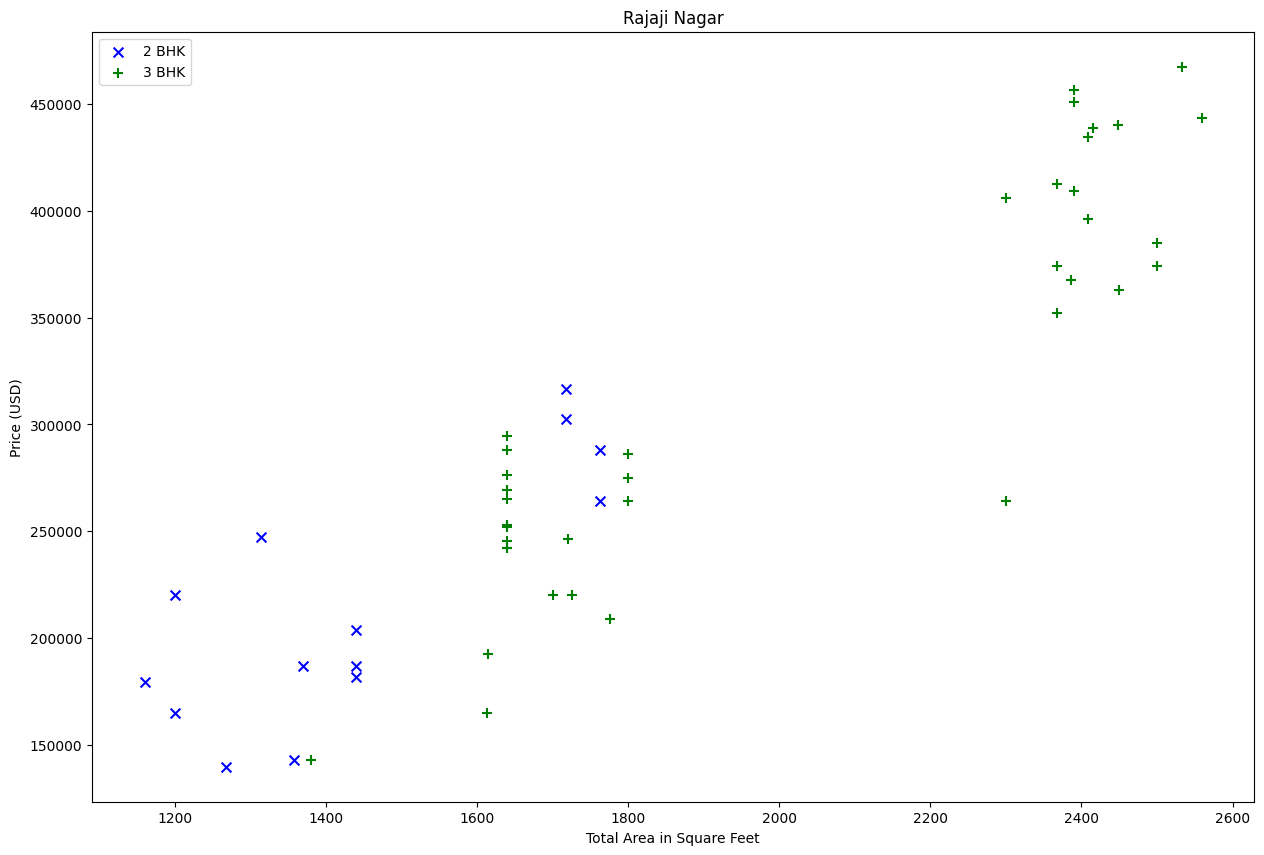

In [826]:
plot_scatter_chart(df7, "Rajaji Nagar")

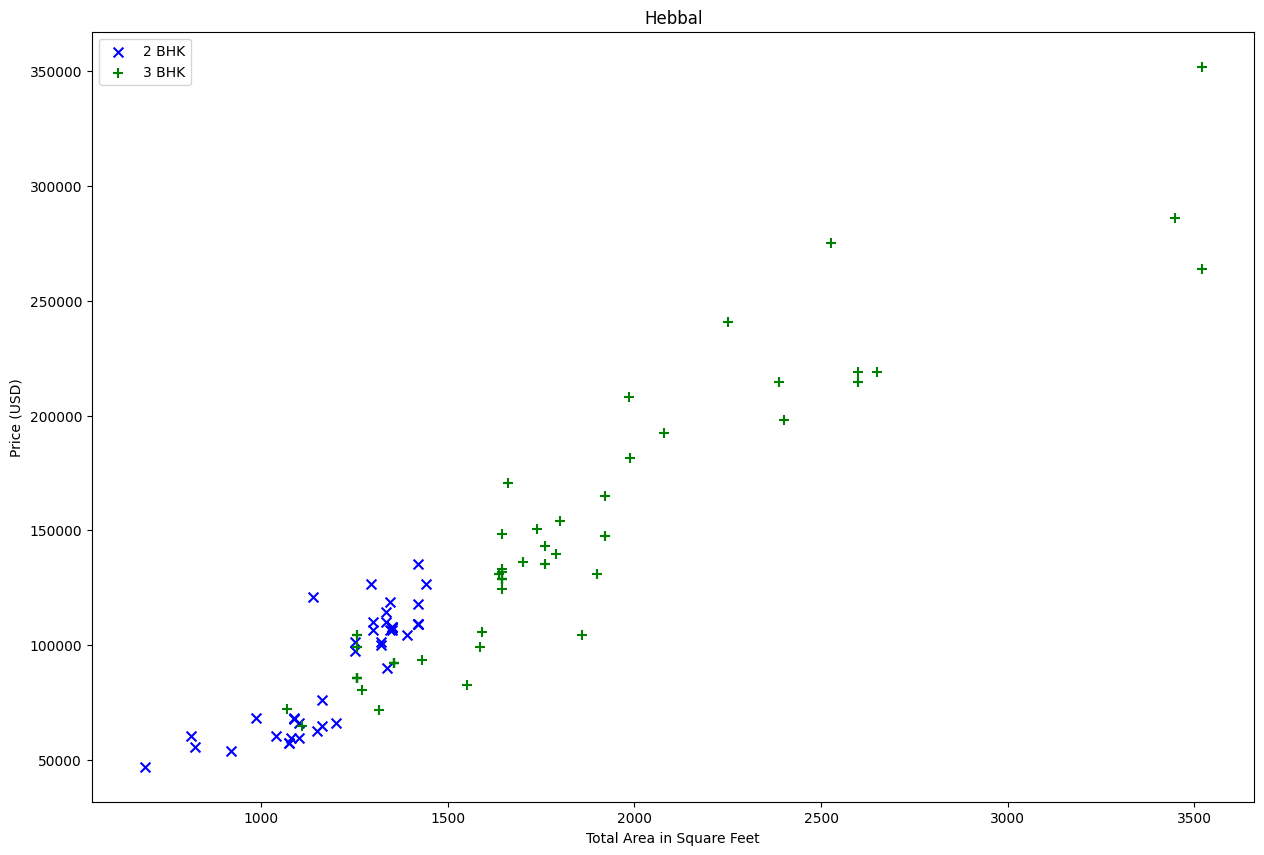

In [827]:
plot_scatter_chart(df7, "Hebbal")

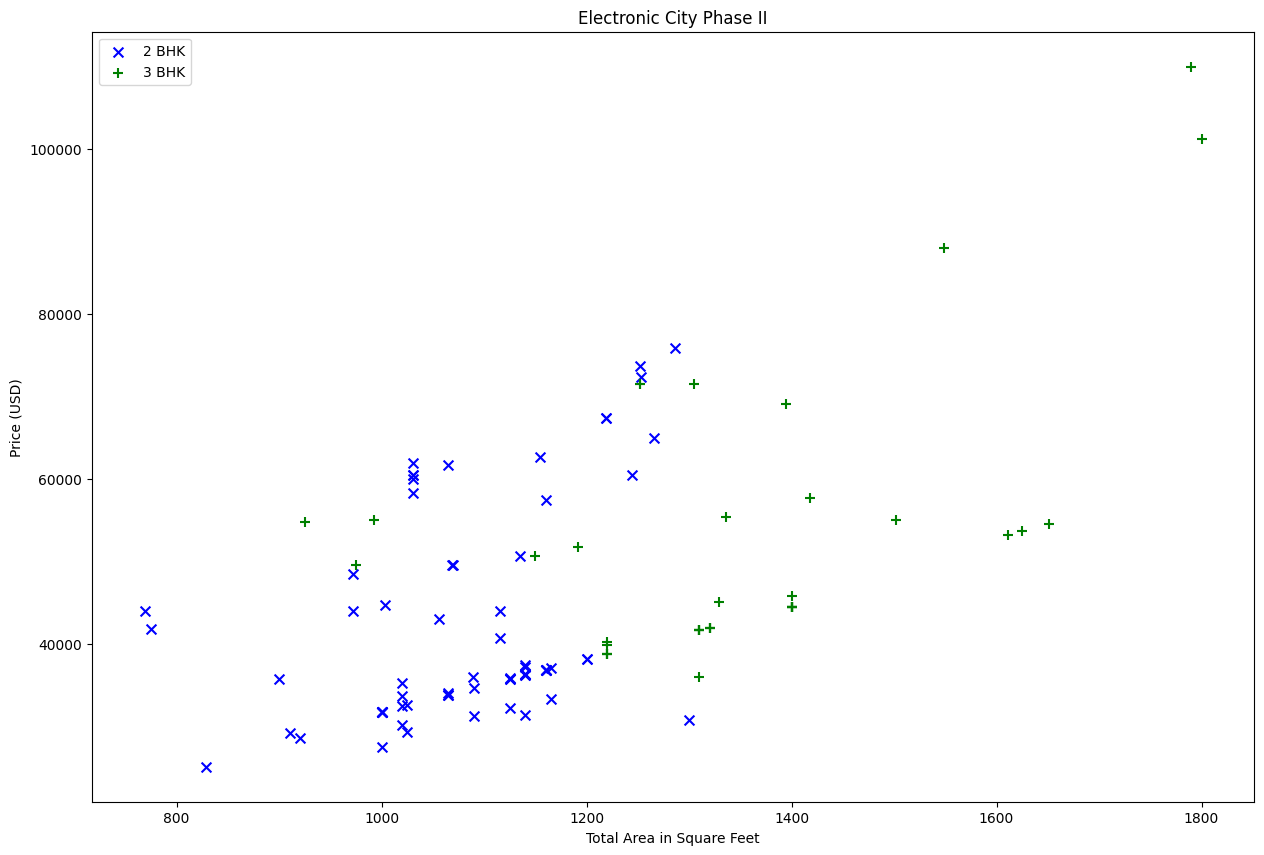

In [828]:
plot_scatter_chart(df7, "Electronic City Phase II")

In [829]:
def remove_bedroom_outliers(df):
    exclude = np.array([])
    for location, location_df in df.groupby("location"): # looking at each location individually
        bedroom_stats = {}
        for bedrooms, bedroom_df in location_df.groupby("bhk"):
            bedroom_stats[bedrooms] = {
                "mean": np.mean(bedroom_df["price_per_sqft"]),
                "std": np.std(bedroom_df["price_per_sqft"]),
                "count": bedroom_df.shape[0]
            }
        for bedrooms, bedroom_df in location_df.groupby("bhk"):
            stats = bedroom_stats.get(bedrooms - 1)
            if stats and stats["count"] > 5:
                exclude = np.append(exclude, bedroom_df[bedroom_df["price_per_sqft"] < stats["mean"]].index.values) # appending the index values of all the rows that we want to get rid, they still hold their original index values
    return df.drop(exclude, axis=0)

In [830]:
df8 = remove_bedroom_outliers(df7)
df8.shape

(7329, 7)

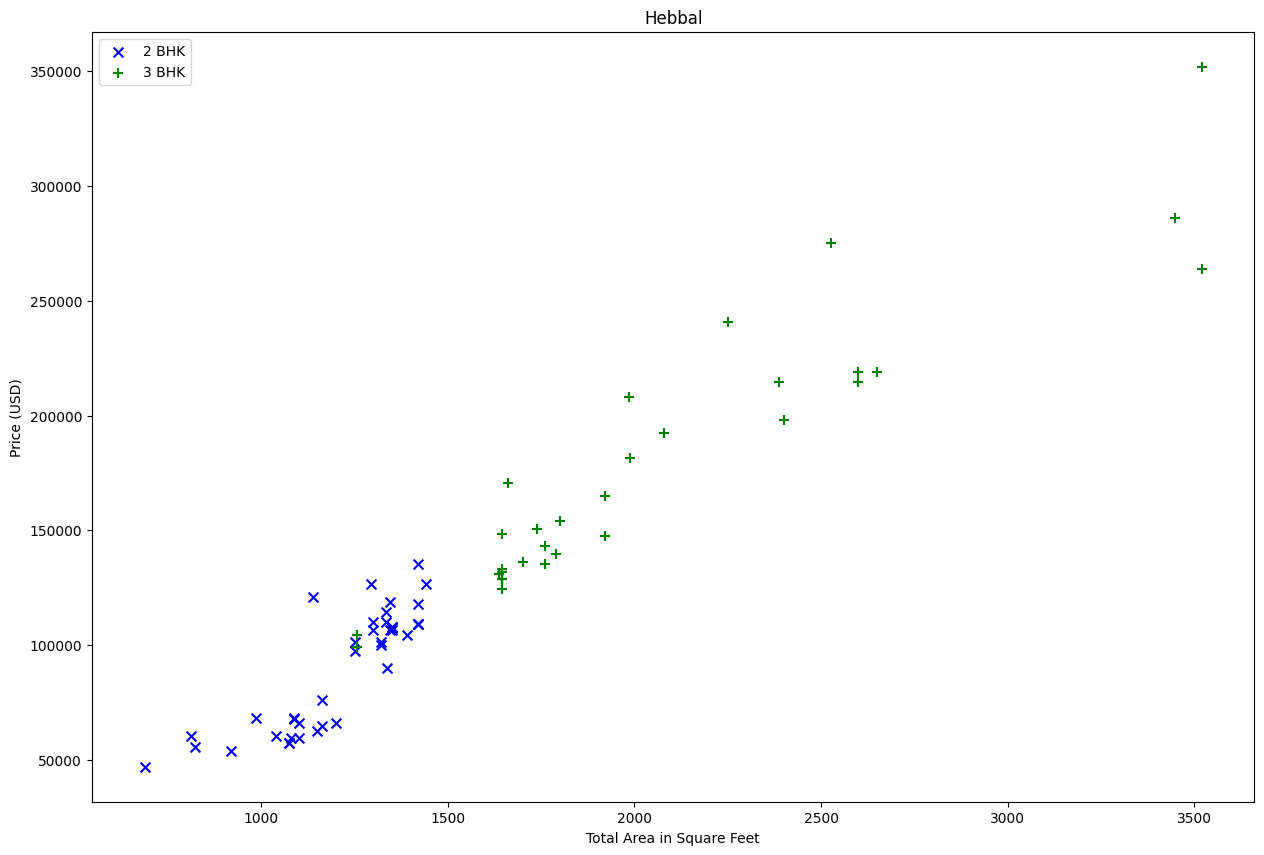

In [831]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

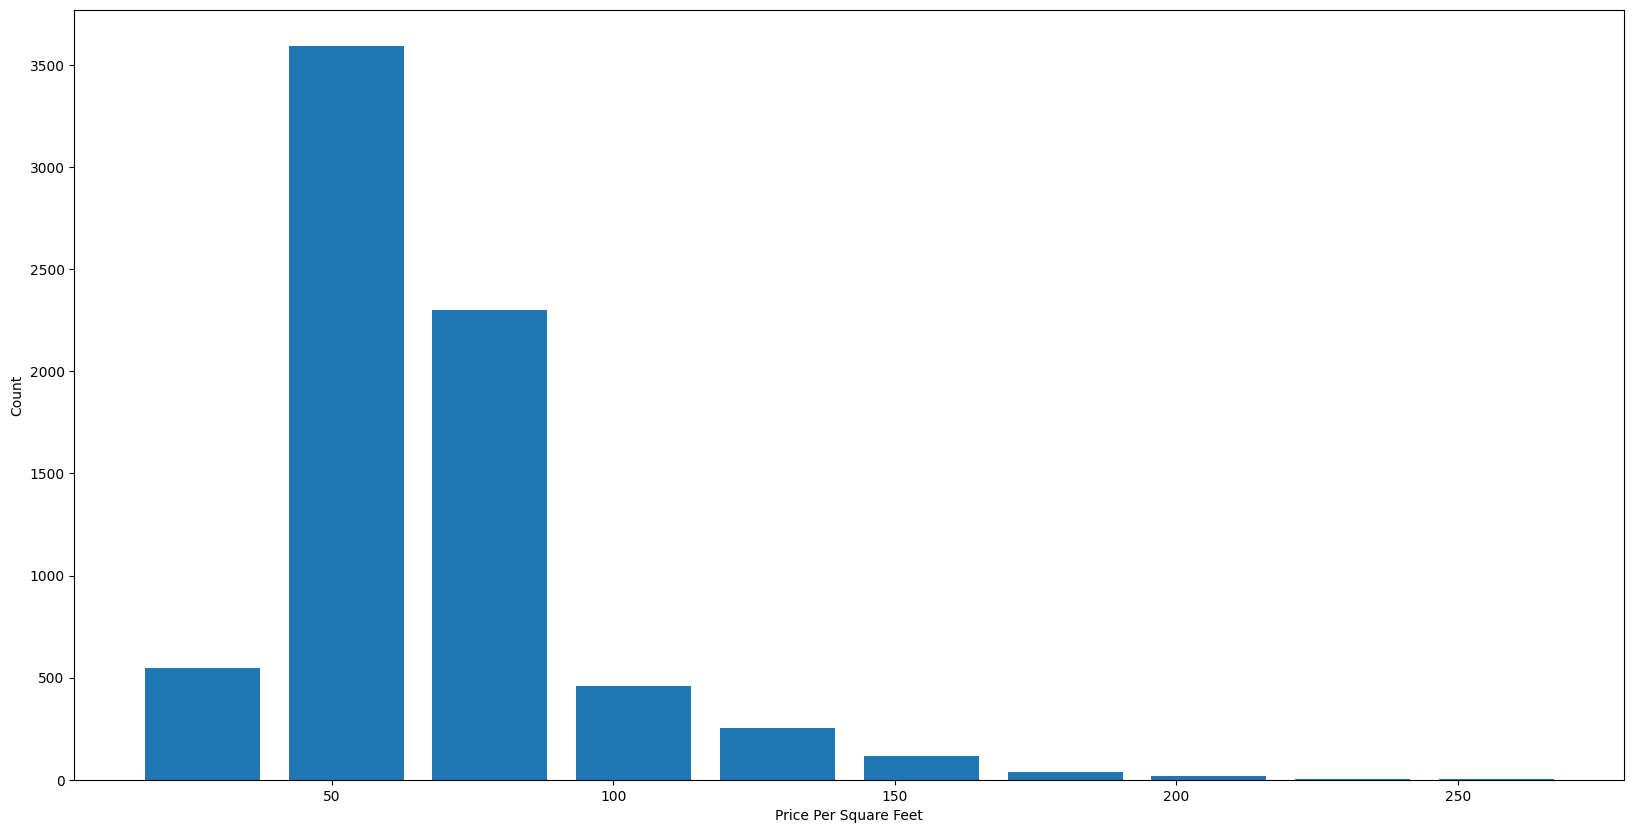

In [832]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8["price_per_sqft"], rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [833]:
df8["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [834]:
df8[df8["bath"] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,176000.0,10,44.000000
8486,other,10 BHK,12000.0,12.0,577500.0,10,48.125000
8575,other,16 BHK,10000.0,16.0,605000.0,16,60.500000
9308,other,11 BHK,6000.0,12.0,165000.0,11,27.500000
9639,other,13 BHK,5425.0,13.0,302500.0,13,55.760369


Text(0, 0.5, 'Count')

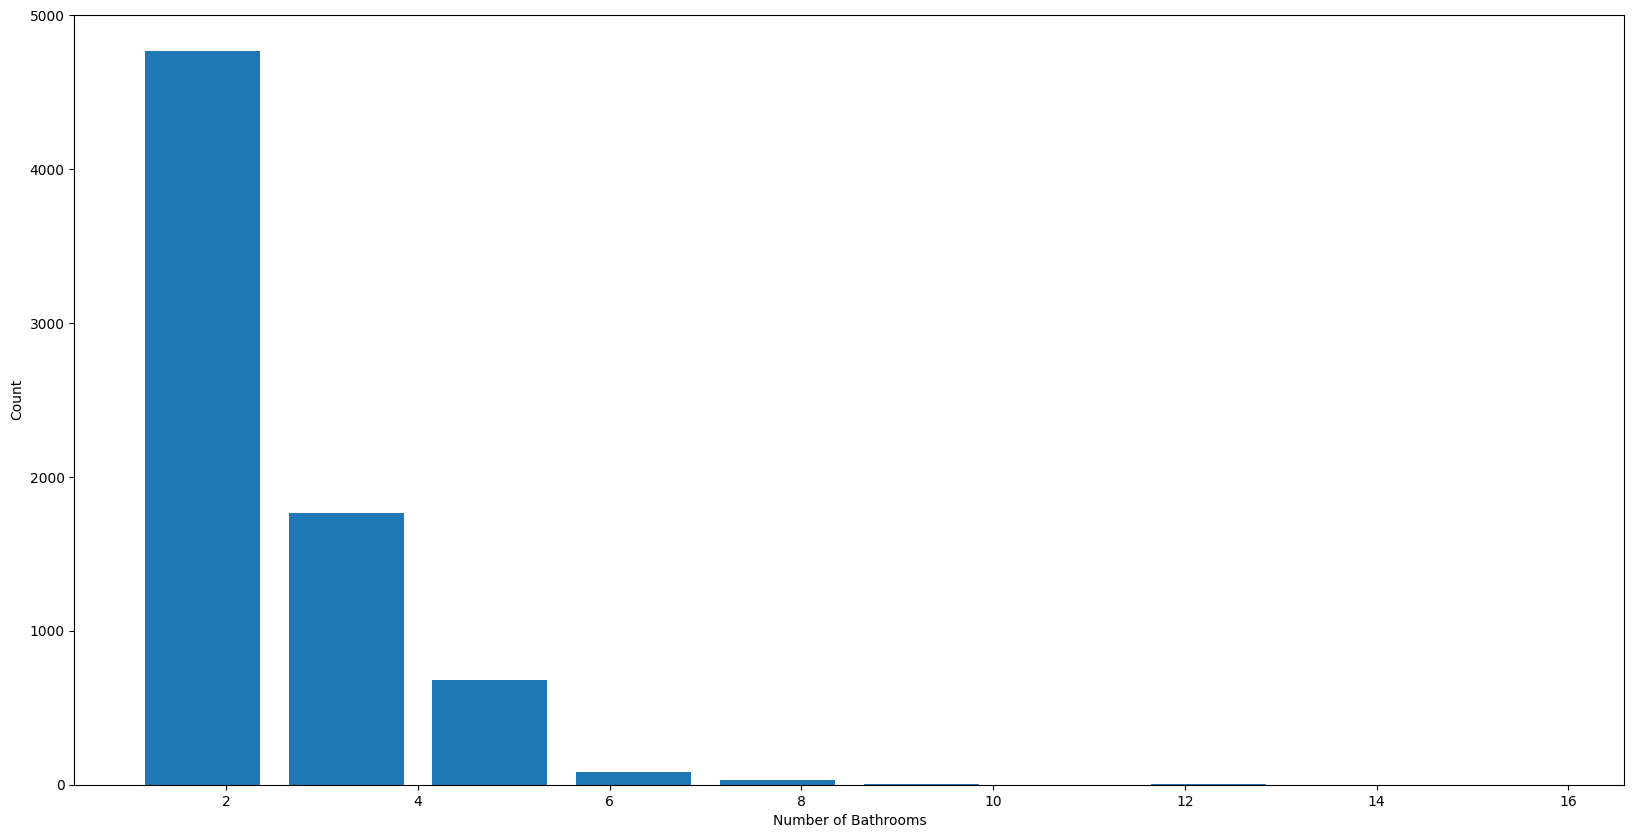

In [835]:
plt.hist(df8["bath"], rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [836]:
# the left weighted curve above makes sense because we don't generally expect more than 4 bathrooms in a house
df8[df8["bath"] > (df8["bhk"] + 2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,88000.0,4,35.772358
5238,Nagasandra,4 Bedroom,7000.0,8.0,495000.0,4,70.714286
6711,Thanisandra,3 BHK,1806.0,6.0,127600.0,3,70.653378
8411,other,6 BHK,11338.0,9.0,1100000.0,6,97.018875


In [837]:
df9 = df8[df8["bath"] < df8["bhk"] + 2]
df9.shape

(7251, 7)

In [838]:
df10 = df9.drop(["price_per_sqft", "size"], axis=1)

In [839]:
dummies = pd.get_dummies(df10["location"])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [840]:
df11 = pd.concat([df10, dummies.drop("other", axis=1)], axis=1)
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,470800.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,213400.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,258500.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [841]:
df12 = df11.drop("location", axis=1)
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,470800.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,213400.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,258500.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [842]:
df12.shape

(7251, 245)

In [843]:
X = df12.drop("price", axis=1)

In [844]:
y = df12["price"]
y.head(3)

0    470800.0
1    213400.0
2    258500.0
Name: price, dtype: float64

In [845]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [846]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8452277697874343

In [847]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [848]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [849]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                # "normalize": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["squared_error"],
                "splitter": ["best", "random"]
                
            }           
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

In [850]:
find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.818342,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.715984,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [851]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return model.predict([x])[0]

In [852]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

c:\Users\Ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91848.95144910894

In [853]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [854]:
predict_price("Vishwapriya Layout", 2500, 3, 5)

c:\Users\Ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


180668.72676806344

In [855]:
predict_price("Vishwapriya Layout", 2500, 3, 7)

c:\Users\Ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176768.39568673098

In [856]:
import pickle
with open("banglore_home_prices_model.pickle", "wb") as f:
    pickle.dump(model, f)

In [857]:
import json
columns = {
    "data_columns": [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))